# Steps Involved : Data Exploration, Model Fitting, Best Model Selection, Inference

# Data Exploration

In [1]:
Parameter=['IDR'];
n_jobs1=60;

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data1 = pd.read_excel('ML-BRBF-All-EDPs-Database.xlsx', sheet_name='All')
data1.head()

,Unique Model Name,PGA (g),PGV (cm/s),PGD (cm),Significant Duration (s),Arias Intensity(m/s),Mean Period (s),Sa-1s (g),Sa-2s (g),Sa-3s (g),...,Sa-5s (g),Magnitude,Radius of rupture (km),Total Height (m),Span (m),Total BRB Area in one frame (cm2),IDR,RDR,Maximum Ductility,Cumulative Ductility
0,SF-2.0-12S3B-RS-12.00-RSN1_HELENA.A_A-HMC180,0.32152,11.75174,2.70919,2.410,0.27838,0.23620,0.05662,0.03349,0.01544,...,0.00579,6.00,2.86,49.05,12.0,467.741,0.32522,0.052478,1.7476,2.3270
1,SF-2.0-12S3B-RS-12.00-RSN1_HELENA.A_A-HMC270,0.31202,27.53322,8.06120,2.540,0.39605,0.43577,0.27232,0.09648,0.04029,...,0.01151,6.00,2.86,49.05,12.0,467.741,0.73114,0.334040,3.9082,5.6614
2,SF-2.0-12S3B-RS-12.00-RSN1004_NORTHR_SPV270,1.50503,155.34685,23.68308,8.205,18.85806,0.60101,2.26764,0.49556,0.20821,...,0.06979,6.69,8.44,49.05,12.0,467.741,3.35340,1.444600,21.6810,73.6317
3,SF-2.0-12S3B-RS-12.00-RSN1004_NORTHR_SPV360,1.86401,152.53804,35.34491,8.530,27.95650,0.45532,1.25684,0.40397,0.50885,...,0.10308,6.69,8.44,49.05,12.0,467.741,3.68310,2.690000,22.9677,105.4344
4,SF-2.0-12S3B-RS-12.00-RSN1013_NORTHR_LDM064,0.85261,149.68215,38.12629,6.490,7.05099,0.87434,1.43129,0.94287,0.22331,...,0.12703,6.69,5.92,49.05,12.0,467.741,4.81950,2.064900,30.8968,72.2971


In [2]:
index_idr = data1.columns.get_loc('IDR')
index_Parameter = data1.columns.get_loc(Parameter[0])
data = data1.iloc[:, list(range(1, index_idr)) + [index_Parameter]]
data.head()

,PGA (g),PGV (cm/s),PGD (cm),Significant Duration (s),Arias Intensity(m/s),Mean Period (s),Sa-1s (g),Sa-2s (g),Sa-3s (g),Sa-4s (g),Sa-5s (g),Magnitude,Radius of rupture (km),Total Height (m),Span (m),Total BRB Area in one frame (cm2),IDR
0,0.32152,11.75174,2.70919,2.410,0.27838,0.23620,0.05662,0.03349,0.01544,0.00968,0.00579,6.00,2.86,49.05,12.0,467.741,0.32522
1,0.31202,27.53322,8.06120,2.540,0.39605,0.43577,0.27232,0.09648,0.04029,0.01976,0.01151,6.00,2.86,49.05,12.0,467.741,0.73114
2,1.50503,155.34685,23.68308,8.205,18.85806,0.60101,2.26764,0.49556,0.20821,0.11746,0.06979,6.69,8.44,49.05,12.0,467.741,3.35340
3,1.86401,152.53804,35.34491,8.530,27.95650,0.45532,1.25684,0.40397,0.50885,0.19080,0.10308,6.69,8.44,49.05,12.0,467.741,3.68310
4,0.85261,149.68215,38.12629,6.490,7.05099,0.87434,1.43129,0.94287,0.22331,0.17392,0.12703,6.69,5.92,49.05,12.0,467.741,4.81950


In [3]:
X = data.loc[:, data.columns != Parameter[0]]
y=data[Parameter[0]]
X.head()

,PGA (g),PGV (cm/s),PGD (cm),Significant Duration (s),Arias Intensity(m/s),Mean Period (s),Sa-1s (g),Sa-2s (g),Sa-3s (g),Sa-4s (g),Sa-5s (g),Magnitude,Radius of rupture (km),Total Height (m),Span (m),Total BRB Area in one frame (cm2)
0,0.32152,11.75174,2.70919,2.410,0.27838,0.23620,0.05662,0.03349,0.01544,0.00968,0.00579,6.00,2.86,49.05,12.0,467.741
1,0.31202,27.53322,8.06120,2.540,0.39605,0.43577,0.27232,0.09648,0.04029,0.01976,0.01151,6.00,2.86,49.05,12.0,467.741
2,1.50503,155.34685,23.68308,8.205,18.85806,0.60101,2.26764,0.49556,0.20821,0.11746,0.06979,6.69,8.44,49.05,12.0,467.741
3,1.86401,152.53804,35.34491,8.530,27.95650,0.45532,1.25684,0.40397,0.50885,0.19080,0.10308,6.69,8.44,49.05,12.0,467.741
4,0.85261,149.68215,38.12629,6.490,7.05099,0.87434,1.43129,0.94287,0.22331,0.17392,0.12703,6.69,5.92,49.05,12.0,467.741


In [4]:
y.head()

0    0.32522
1    0.73114
2    3.35340
3    3.68310
4    4.81950
Name: IDR, dtype: float64

In [5]:
evaluation = pd.DataFrame({'Model': [],
                           'EDP':[],
                           'R-squared (training)':[],
                           'Root Mean Squared Error (RMSE) (training)':[],
                           'Mean Absolute Error (MAE) (training)':[],
                           'R-squared (testing)':[],
                           'Root Mean Squared Error (RMSE) (testing)':[],      
                           'Mean Absolute Error (MAE) (testing)':[],
                           '10-Fold Cross Validation':[]})

In [6]:
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import mean,sqrt

Spliiting the data into training and test set


In [7]:
from sklearn.model_selection import train_test_split
indices = range(len(y))

X_train, X_test, y_train, y_test, indices_train,indices_test = train_test_split(X, y, indices, test_size=0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
np.savetxt('Indices_train.csv', indices_train, delimiter=',', fmt='%s')
np.savetxt('Indices_test.csv', indices_test, delimiter=',', fmt='%s')

## Linear Regression

In [9]:
Model='Linear Regression'

complex_model_LR = linear_model.LinearRegression()
complex_model_LR.fit(X_train, y_train)

pred_tr = complex_model_LR.predict(X_train)
rsq_tr  = float(format(complex_model_LR.score(X_train, y_train),'.3f'))
rmse_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,pred_tr)),'.3f'))
mae_tr = float(format(mean_absolute_error(y_train,pred_tr),'.3f'))

pred_te = complex_model_LR.predict(X_test)
rsq_te  = float(format(complex_model_LR.score(X_test, y_test),'.3f'))
rmse_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_te)),'.3f'))
mae_te = float(format(mean_absolute_error(y_test,pred_te),'.3f'))

cv = float(format(cross_val_score(complex_model_LR,X_train, y_train,cv=10).mean(),'.3f')) #Finds cross validation score, cv=no. of cross validations

r = evaluation.shape[0]
evaluation.loc[r] = [Model,Parameter[0],rsq_tr,rmse_tr,mae_tr,rsq_te,rmse_te,mae_te,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,EDP,R-squared (training),Root Mean Squared Error (RMSE) (training),Mean Absolute Error (MAE) (training),R-squared (testing),Root Mean Squared Error (RMSE) (testing),Mean Absolute Error (MAE) (testing),10-Fold Cross Validation
0,Linear Regression,IDR,0.737,0.62,0.382,0.733,0.62,0.392,0.735


In [10]:
# Print the predicted and actual value for the test set
LR_y_test_prediction= complex_model_LR.predict(X_test)

np.savetxt('LR_test_prediction_'+Parameter[0]+'.csv', LR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('LR_test_actual_'+Parameter[0]+'.csv', y_test, delimiter=',', fmt='%s')

In [11]:
# Print the predicted and actual value for the traing set
LR_y_train_prediction= complex_model_LR.predict(X_train)

np.savetxt('LR_train_prediction_'+Parameter[0]+'.csv', LR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('LR_train_actual_'+Parameter[0]+'.csv', y_train, delimiter=',', fmt='%s')

In [12]:
X_standardized = scaler.transform(X)
LR_y_pred_entire_data = complex_model_LR.predict(X_standardized)

np.savetxt('LR_entire_prediction_'+Parameter[0]+'.csv', LR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('LR_entire_actual_'+Parameter[0]+'.csv', y, delimiter=',', fmt='%s')

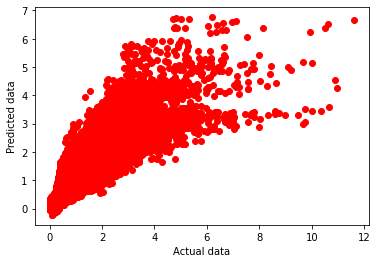

In [13]:
import matplotlib.pyplot as plt
plt.plot(y, LR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

## Ridge Regression

In [14]:
Model='Ridge Regression'

complex_model_RR = linear_model.Ridge(alpha=1)
complex_model_RR.fit(X_train, y_train)

predRR_tr = complex_model_RR.predict(X_train)
rmseRR_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predRR_tr)),'.3f'))
rsqRR_tr  = float(format(complex_model_RR.score(X_train, y_train),'.3f'))
maeRR_tr = float(format(mean_absolute_error(y_train,predRR_tr),'.3f'))

predRR_te = complex_model_RR.predict(X_test)
rmseRR_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predRR_te)),'.3f'))
rsqRR_te  = float(format(complex_model_RR.score(X_test, y_test),'.3f'))
maeRR_te = float(format(mean_absolute_error(y_test,predRR_te),'.3f'))

cvRR     = float(format(cross_val_score(complex_model_RR,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = [Model,Parameter[0],rsqRR_tr,rmseRR_tr,maeRR_tr,rsqRR_te,rmseRR_te,maeRR_te,cvRR]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,EDP,R-squared (training),Root Mean Squared Error (RMSE) (training),Mean Absolute Error (MAE) (training),R-squared (testing),Root Mean Squared Error (RMSE) (testing),Mean Absolute Error (MAE) (testing),10-Fold Cross Validation
0,Linear Regression,IDR,0.737,0.62,0.382,0.733,0.62,0.392,0.735
1,Ridge Regression,IDR,0.737,0.62,0.382,0.733,0.62,0.392,0.735


In [15]:
# Print the predicted and actual value for the test set
Ridge_y_test_prediction= complex_model_RR.predict(X_test)

np.savetxt('Ridge_test_prediction_'+Parameter[0]+'.csv', Ridge_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('Ridge_test_actual_'+Parameter[0]+'.csv', y_test, delimiter=',', fmt='%s')

In [16]:
# Print the predicted and actual value for the traing set
Ridge_y_train_prediction= complex_model_RR.predict(X_train)

np.savetxt('Ridge_train_prediction_'+Parameter[0]+'.csv', Ridge_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('Ridge_train_actual_'+Parameter[0]+'.csv', y_train, delimiter=',', fmt='%s')

In [17]:
X_standardized = scaler.transform(X)
Ridge_y_pred_entire_data = complex_model_RR.predict(X_standardized)

np.savetxt('Ridge_entire_prediction_'+Parameter[0]+'.csv', Ridge_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('Ridge_entire_actual_'+Parameter[0]+'.csv', y, delimiter=',', fmt='%s')

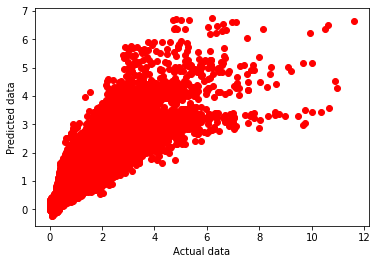

In [18]:
import matplotlib.pyplot as plt
plt.plot(y,Ridge_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

## Lasso Regression

In [19]:
Model='Lasso Regression'

complex_model_LaR = linear_model.Lasso(alpha=0.01)
complex_model_LaR.fit(X_train, y_train)

predLaR_tr = complex_model_LaR.predict(X_train)
rmseLaR_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predLaR_tr)),'.3f'))
rsqLaR_tr  = float(format(complex_model_LaR.score(X_train, y_train),'.3f'))
maeLaR_tr = float(format(mean_absolute_error(y_train,predLaR_tr),'.3f'))

predLaR_te = complex_model_LaR.predict(X_test)
rmseLaR_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predLaR_te)),'.3f'))
rsqLaR_te  = float(format(complex_model_LaR.score(X_test, y_test),'.3f'))
maeLaR_te = float(format(mean_absolute_error(y_test,predLaR_te),'.3f'))
cvLaR      = float(format(cross_val_score(complex_model_LaR,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = [Model,Parameter[0],rsqLaR_tr,rmseLaR_tr,maeLaR_tr,rsqLaR_te,rmseLaR_te,maeLaR_te,cvLaR]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,EDP,R-squared (training),Root Mean Squared Error (RMSE) (training),Mean Absolute Error (MAE) (training),R-squared (testing),Root Mean Squared Error (RMSE) (testing),Mean Absolute Error (MAE) (testing),10-Fold Cross Validation
0,Linear Regression,IDR,0.737,0.62,0.382,0.733,0.620,0.392,0.735
1,Ridge Regression,IDR,0.737,0.62,0.382,0.733,0.620,0.392,0.735
2,Lasso Regression,IDR,0.720,0.64,0.389,0.723,0.631,0.394,0.719


In [20]:
# Print the predicted and actual value for the test set
Lasso_y_test_prediction= complex_model_LaR.predict(X_test)

np.savetxt('Lasso_test_prediction_'+Parameter[0]+'.csv', Lasso_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('Lasso_test_actual_'+Parameter[0]+'.csv', y_test, delimiter=',', fmt='%s')

In [21]:
# Print the predicted and actual value for the traing set
Lasso_y_train_prediction= complex_model_LaR.predict(X_train)

np.savetxt('Lasso_train_prediction_'+Parameter[0]+'.csv', Lasso_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('Lasso_train_actual_'+Parameter[0]+'.csv', y_train, delimiter=',', fmt='%s')

In [22]:
X_standardized = scaler.transform(X)
Lasso_y_pred_entire_data = complex_model_LaR.predict(X_standardized)

np.savetxt('Lasso_entire_prediction_'+Parameter[0]+'.csv', Lasso_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('Lasso_entire_actual_'+Parameter[0]+'.csv', y, delimiter=',', fmt='%s')

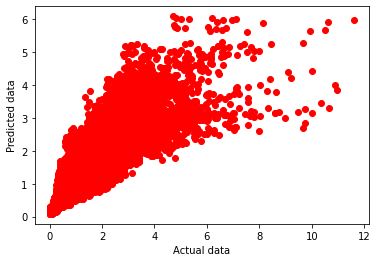

In [23]:
import matplotlib.pyplot as plt
plt.plot(y,Lasso_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

## K- nearest Neighbors

In [24]:
Model='KNN'

KNNReg = KNeighborsRegressor(metric='manhattan',n_neighbors=5,weights='distance')
KNNReg.fit(X_train, y_train)

predKNNReg_tr = KNNReg.predict(X_train)
rmseKNNReg_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predKNNReg_tr)),'.3f'))
rsqKNNReg_tr  = float(format(KNNReg.score(X_train, y_train),'.3f'))
maeKNNReg_tr = float(format(mean_absolute_error(y_train,predKNNReg_tr),'.3f'))

predKNNReg_te = KNNReg.predict(X_test)
rmseKNNReg_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predKNNReg_te)),'.3f'))
rsqKNNReg_te  = float(format(KNNReg.score(X_test, y_test),'.3f'))
maeKNNReg_te = float(format(mean_absolute_error(y_test,predKNNReg_te),'.3f'))

cvKNNReg      = float(format(cross_val_score(KNNReg,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = [Model,Parameter[0],rsqKNNReg_tr,rmseKNNReg_tr,maeKNNReg_tr,rsqKNNReg_te,rmseKNNReg_te,maeKNNReg_te,cvKNNReg]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,EDP,R-squared (training),Root Mean Squared Error (RMSE) (training),Mean Absolute Error (MAE) (training),R-squared (testing),Root Mean Squared Error (RMSE) (testing),Mean Absolute Error (MAE) (testing),10-Fold Cross Validation
3,KNN,IDR,1.000,0.00,0.000,0.930,0.317,0.181,0.909
0,Linear Regression,IDR,0.737,0.62,0.382,0.733,0.620,0.392,0.735
1,Ridge Regression,IDR,0.737,0.62,0.382,0.733,0.620,0.392,0.735
2,Lasso Regression,IDR,0.720,0.64,0.389,0.723,0.631,0.394,0.719


In [25]:
# Print the predicted and actual value for the test set
KNN_y_test_prediction= KNNReg.predict(X_test)

np.savetxt('KNN_test_prediction_'+Parameter[0]+'.csv', KNN_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('KNN_test_actual_'+Parameter[0]+'.csv', y_test, delimiter=',', fmt='%s')

In [26]:
# Print the predicted and actual value for the traing set
KNN_y_train_prediction= KNNReg.predict(X_train)

np.savetxt('KNN_train_prediction_'+Parameter[0]+'.csv', KNN_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('KNN_train_actual_'+Parameter[0]+'.csv', y_train, delimiter=',', fmt='%s')

In [27]:
X_standardized = scaler.transform(X)
KNN_y_pred_entire_data = KNNReg.predict(X_standardized)

np.savetxt('KNN_entire_prediction_'+Parameter[0]+'.csv', KNN_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('KNN_entire_actual_'+Parameter[0]+'.csv', y, delimiter=',', fmt='%s')

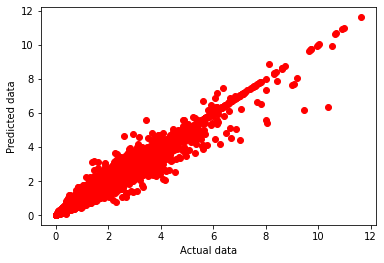

In [28]:
import matplotlib.pyplot as plt
plt.plot(y,KNN_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

## Decision Tree Regression

In [29]:
Model='Decision Tree'

from sklearn.tree import DecisionTreeRegressor
DT_model= DecisionTreeRegressor(random_state=0,max_depth=14)

DT_model.fit(X_train, y_train)

predDT_tr = DT_model.predict(X_train)
rmseDT_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predDT_tr)),'.3f'))
rsqDT_tr  = float(format(DT_model.score(X_train, y_train),'.3f'))
maeDT_tr = float(format(mean_absolute_error(y_train,predDT_tr),'.3f'))

predDT_te = DT_model.predict(X_test)
rmseDT_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predDT_te)),'.3f'))
rsqDT_te  = float(format(DT_model.score(X_test, y_test),'.3f'))
maeDT_te = float(format(mean_absolute_error(y_test,predDT_te),'.3f'))
cvDT      = float(format(cross_val_score(DT_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = [Model,Parameter[0],rsqDT_tr,rmseDT_tr,maeDT_tr,rsqDT_te,rmseDT_te,maeDT_te,cvDT]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)   

,Model,EDP,R-squared (training),Root Mean Squared Error (RMSE) (training),Mean Absolute Error (MAE) (training),R-squared (testing),Root Mean Squared Error (RMSE) (testing),Mean Absolute Error (MAE) (testing),10-Fold Cross Validation
3,KNN,IDR,1.000,0.000,0.000,0.930,0.317,0.181,0.909
4,Decision Tree,IDR,0.985,0.149,0.072,0.904,0.371,0.208,0.890
0,Linear Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
1,Ridge Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
2,Lasso Regression,IDR,0.720,0.640,0.389,0.723,0.631,0.394,0.719


In [30]:
# Print the predicted and actual value for the test set
DT_y_test_prediction= DT_model.predict(X_test)

np.savetxt('DT_test_prediction_'+Parameter[0]+'.csv', DT_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('DT_test_actual_'+Parameter[0]+'.csv', y_test, delimiter=',', fmt='%s')

In [31]:
# Print the predicted and actual value for the traing set
DT_y_train_prediction= DT_model.predict(X_train)

np.savetxt('DT_train_prediction_'+Parameter[0]+'.csv', DT_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('DT_train_actual_'+Parameter[0]+'.csv', y_train, delimiter=',', fmt='%s')

In [32]:
X_standardized = scaler.transform(X)
DT_y_pred_entire_data = DT_model.predict(X_standardized)

np.savetxt('DT_entire_prediction_'+Parameter[0]+'.csv', DT_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('DT_entire_actual_'+Parameter[0]+'.csv', y, delimiter=',', fmt='%s')

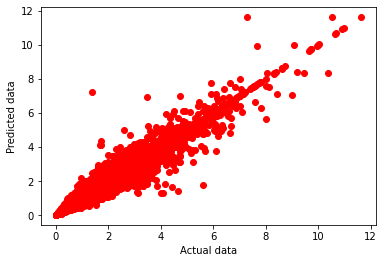

In [33]:
import matplotlib.pyplot as plt
plt.plot(y, DT_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

## Random Forest Regression

In [34]:
Model='Random Forest'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.ensemble import RandomForestRegressor
RF_model= RandomForestRegressor(random_state=0,max_depth=18,max_features='auto',n_estimators=300,n_jobs=n_jobs1)

RF_model.fit(X_train, y_train)

predRF_tr = RF_model.predict(X_train)
rmseRF_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predRF_tr)),'.3f'))
rsqRF_tr  = float(format(RF_model.score(X_train, y_train),'.3f'))
maeRF_tr = float(format(mean_absolute_error(y_train,predRF_tr),'.3f'))

predRF_te = RF_model.predict(X_test)
rmseRF_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predRF_te)),'.3f'))
rsqRF_te  = float(format(RF_model.score(X_test, y_test),'.3f'))
maeRF_te = float(format(mean_absolute_error(y_test,predRF_te),'.3f'))
cvRF      = float(format(cross_val_score(RF_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = [Model,Parameter[0],rsqRF_tr,rmseRF_tr,maeRF_tr,rsqRF_te,rmseRF_te,maeRF_te,cvRF]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,EDP,R-squared (training),Root Mean Squared Error (RMSE) (training),Mean Absolute Error (MAE) (training),R-squared (testing),Root Mean Squared Error (RMSE) (testing),Mean Absolute Error (MAE) (testing),10-Fold Cross Validation
5,Random Forest,IDR,0.991,0.114,0.067,0.946,0.279,0.164,0.936
3,KNN,IDR,1.000,0.000,0.000,0.930,0.317,0.181,0.909
4,Decision Tree,IDR,0.985,0.149,0.072,0.904,0.371,0.208,0.890
0,Linear Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
1,Ridge Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
2,Lasso Regression,IDR,0.720,0.640,0.389,0.723,0.631,0.394,0.719


In [35]:
# Print the predicted and actual value for the test set
RF_y_test_prediction= RF_model.predict(X_test)

np.savetxt('RF_test_prediction_'+Parameter[0]+'.csv', RF_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('RF_test_actual_'+Parameter[0]+'.csv', y_test, delimiter=',', fmt='%s')

In [36]:
# Print the predicted and actual value for the traing set
RF_y_train_prediction= RF_model.predict(X_train)

np.savetxt('RF_train_prediction_'+Parameter[0]+'.csv', RF_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('RF_train_actual_'+Parameter[0]+'.csv', y_train, delimiter=',', fmt='%s')

In [37]:
X_standardized = scaler.transform(X)
RF_y_pred_entire_data = RF_model.predict(X_standardized)

np.savetxt('RF_entire_prediction_'+Parameter[0]+'.csv', RF_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('RF_entire_actual_'+Parameter[0]+'.csv', y, delimiter=',', fmt='%s')

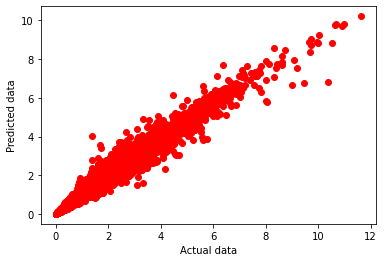

In [38]:
import matplotlib.pyplot as plt
plt.plot(y, RF_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

## XG Boost Regression

In [39]:
Model='XGBoost'

import xgboost as xgb
from xgboost import plot_importance

XGB_model = xgb.XGBRegressor(random_state=0,max_depth=8,n_estimators=1000, colsample_bytree=0.5, learning_rate=0.1,n_jobs=n_jobs1)
XGB_model.fit(X_train, y_train)

predXGB_tr = XGB_model.predict(X_train)
rmseXGB_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predXGB_tr)),'.3f'))
rsqXGB_tr  = float(format(XGB_model.score(X_train, y_train),'.3f'))
maeXGB_tr = float(format(mean_absolute_error(y_train,predXGB_tr),'.3f'))

predXGB_te = XGB_model.predict(X_test)
rmseXGB_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predXGB_te)),'.3f'))
rsqXGB_te  = float(format(XGB_model.score(X_test, y_test),'.3f'))
maeXGB_te = float(format(mean_absolute_error(y_test,predXGB_te),'.3f'))

cvXGB      = float(format(cross_val_score(XGB_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = [Model,Parameter[0],rsqXGB_tr,rmseXGB_tr,maeXGB_tr,rsqXGB_te,rmseXGB_te,maeXGB_te,cvXGB]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,EDP,R-squared (training),Root Mean Squared Error (RMSE) (training),Mean Absolute Error (MAE) (training),R-squared (testing),Root Mean Squared Error (RMSE) (testing),Mean Absolute Error (MAE) (testing),10-Fold Cross Validation
6,XGBoost,IDR,1.000,0.019,0.013,0.963,0.229,0.136,0.956
5,Random Forest,IDR,0.991,0.114,0.067,0.946,0.279,0.164,0.936
3,KNN,IDR,1.000,0.000,0.000,0.930,0.317,0.181,0.909
4,Decision Tree,IDR,0.985,0.149,0.072,0.904,0.371,0.208,0.890
0,Linear Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
1,Ridge Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
2,Lasso Regression,IDR,0.720,0.640,0.389,0.723,0.631,0.394,0.719


In [40]:
# Print the predicted and actual value for the test set
XGB_y_test_prediction= XGB_model.predict(X_test)

np.savetxt('XG_test_prediction_'+Parameter[0]+'.csv', XGB_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('XG_test_actual_'+Parameter[0]+'.csv', y_test, delimiter=',', fmt='%s')

In [41]:
# Print the predicted and actual value for the traing set
XGB_y_train_prediction= XGB_model.predict(X_train)

np.savetxt('XG_train_prediction_'+Parameter[0]+'.csv', XGB_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('XG_train_actual_'+Parameter[0]+'.csv', y_train, delimiter=',', fmt='%s')

In [42]:
X_standardized = scaler.transform(X)
XGB_y_pred_entire_data = XGB_model.predict(X_standardized)

np.savetxt('XG_entire_prediction_'+Parameter[0]+'.csv', XGB_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('XG_entire_actual_'+Parameter[0]+'.csv', y, delimiter=',', fmt='%s')

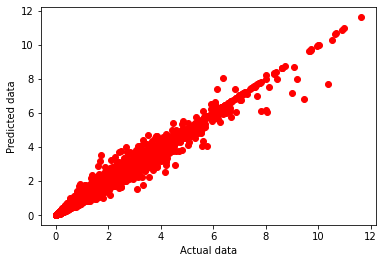

In [43]:
import matplotlib.pyplot as plt
plt.plot(y, XGB_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

## ADABOOST REGRESSION

In [44]:
Model='AdaBoost'

from sklearn.ensemble import AdaBoostRegressor

ADB_model = AdaBoostRegressor(random_state=0, n_estimators=267, learning_rate=0.03)
ADB_model.fit(X_train, y_train)

predADB_tr = ADB_model.predict(X_train)
rmseADB_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predADB_tr)),'.3f'))
rsqADB_tr  = float(format(ADB_model.score(X_train, y_train),'.3f'))
maeADB_tr = float(format(mean_absolute_error(y_train,predADB_tr),'.3f'))

predADB_te = ADB_model.predict(X_test)
rmseADB_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predADB_te)),'.3f'))
rsqADB_te  = float(format(ADB_model.score(X_test, y_test),'.3f'))
maeADB_te = float(format(mean_absolute_error(y_test,predADB_te),'.3f'))
cvADB      = float(format(cross_val_score(ADB_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = [Model,Parameter[0],rsqADB_tr,rmseADB_tr,maeADB_tr,rsqADB_te,rmseADB_te,maeADB_te,cvADB]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,EDP,R-squared (training),Root Mean Squared Error (RMSE) (training),Mean Absolute Error (MAE) (training),R-squared (testing),Root Mean Squared Error (RMSE) (testing),Mean Absolute Error (MAE) (testing),10-Fold Cross Validation
6,XGBoost,IDR,1.000,0.019,0.013,0.963,0.229,0.136,0.956
5,Random Forest,IDR,0.991,0.114,0.067,0.946,0.279,0.164,0.936
3,KNN,IDR,1.000,0.000,0.000,0.930,0.317,0.181,0.909
4,Decision Tree,IDR,0.985,0.149,0.072,0.904,0.371,0.208,0.890
7,AdaBoost,IDR,0.757,0.596,0.406,0.732,0.621,0.418,0.741
0,Linear Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
1,Ridge Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
2,Lasso Regression,IDR,0.720,0.640,0.389,0.723,0.631,0.394,0.719


In [45]:
# Print the predicted and actual value for the test set
ADB_y_test_prediction= ADB_model.predict(X_test)

np.savetxt('AD_test_prediction_'+Parameter[0]+'.csv', ADB_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('AD_test_actual_'+Parameter[0]+'.csv', y_test, delimiter=',', fmt='%s')

In [46]:
# Print the predicted and actual value for the traing set
ADB_y_train_prediction= ADB_model.predict(X_train)

np.savetxt('AD_train_prediction_'+Parameter[0]+'.csv', ADB_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('AD_train_actual_'+Parameter[0]+'.csv', y_train, delimiter=',', fmt='%s')

In [47]:
X_standardized = scaler.transform(X)
ADB_y_pred_entire_data = ADB_model.predict(X_standardized)

np.savetxt('AD_entire_prediction_'+Parameter[0]+'.csv', ADB_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('AD_entire_actual_'+Parameter[0]+'.csv', y, delimiter=',', fmt='%s')

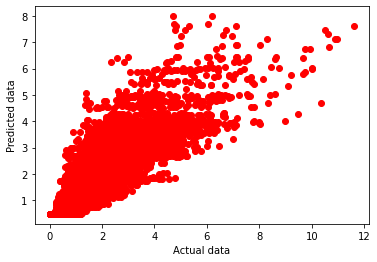

In [48]:
import matplotlib.pyplot as plt
plt.plot(y, ADB_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

## Support Vector Regression

In [49]:
Model='Support Vector Regression'

from sklearn.svm import SVR
SVR_model=SVR(C=100)

SVR_model.fit(X_train, y_train)

predSVR_tr = SVR_model.predict(X_train)
rmseSVR_tr = float(format(np.sqrt(metrics.mean_squared_error(y_train,predSVR_tr)),'.3f'))
rsqSVR_tr  = float(format(SVR_model.score(X_train, y_train),'.3f'))
maeSVR_tr = float(format(mean_absolute_error(y_train,predSVR_tr),'.3f'))

predSVR_te = SVR_model.predict(X_test)
rmseSVR_te = float(format(np.sqrt(metrics.mean_squared_error(y_test,predSVR_te)),'.3f'))
rsqSVR_te  = float(format(SVR_model.score(X_test, y_test),'.3f'))
maeSVR_te = float(format(mean_absolute_error(y_test,predSVR_te),'.3f'))

cvSVR      = float(format(cross_val_score(SVR_model,X_train, y_train,cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = [Model,Parameter[0],rsqSVR_tr,rmseSVR_tr,maeSVR_tr,rsqSVR_te,rmseSVR_te,maeSVR_te,cvSVR]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,EDP,R-squared (training),Root Mean Squared Error (RMSE) (training),Mean Absolute Error (MAE) (training),R-squared (testing),Root Mean Squared Error (RMSE) (testing),Mean Absolute Error (MAE) (testing),10-Fold Cross Validation
6,XGBoost,IDR,1.000,0.019,0.013,0.963,0.229,0.136,0.956
5,Random Forest,IDR,0.991,0.114,0.067,0.946,0.279,0.164,0.936
3,KNN,IDR,1.000,0.000,0.000,0.930,0.317,0.181,0.909
8,Support Vector Regression,IDR,0.940,0.296,0.170,0.912,0.356,0.211,0.904
4,Decision Tree,IDR,0.985,0.149,0.072,0.904,0.371,0.208,0.890
7,AdaBoost,IDR,0.757,0.596,0.406,0.732,0.621,0.418,0.741
0,Linear Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
1,Ridge Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
2,Lasso Regression,IDR,0.720,0.640,0.389,0.723,0.631,0.394,0.719


In [50]:
# Print the predicted and actual value for the test set
SVR_y_test_prediction= SVR_model.predict(X_test)

np.savetxt('SVR_test_prediction_'+Parameter[0]+'.csv', SVR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('SVR_test_actual_'+Parameter[0]+'.csv', y_test, delimiter=',', fmt='%s')

In [51]:
# Print the predicted and actual value for the traing set
SVR_y_train_prediction= SVR_model.predict(X_train)

np.savetxt('SVR_train_prediction_'+Parameter[0]+'.csv', SVR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('SVR_train_actual_'+Parameter[0]+'.csv', y_train, delimiter=',', fmt='%s')

In [52]:
X_standardized = scaler.transform(X)
SVR_y_pred_entire_data = SVR_model.predict(X_standardized)

np.savetxt('SVR_entire_prediction_'+Parameter[0]+'.csv', SVR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('SVR_entire_actual_'+Parameter[0]+'.csv', y, delimiter=',', fmt='%s')

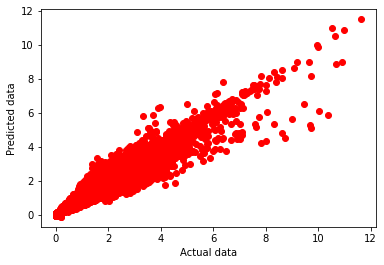

In [53]:
import matplotlib.pyplot as plt
plt.plot(y,SVR_y_pred_entire_data,'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

In [54]:
evaluation=evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)
evaluation.to_excel("Results_Optimised_"+Parameter[0]+".xlsx")
evaluation

,Model,EDP,R-squared (training),Root Mean Squared Error (RMSE) (training),Mean Absolute Error (MAE) (training),R-squared (testing),Root Mean Squared Error (RMSE) (testing),Mean Absolute Error (MAE) (testing),10-Fold Cross Validation
6,XGBoost,IDR,1.000,0.019,0.013,0.963,0.229,0.136,0.956
5,Random Forest,IDR,0.991,0.114,0.067,0.946,0.279,0.164,0.936
3,KNN,IDR,1.000,0.000,0.000,0.930,0.317,0.181,0.909
8,Support Vector Regression,IDR,0.940,0.296,0.170,0.912,0.356,0.211,0.904
4,Decision Tree,IDR,0.985,0.149,0.072,0.904,0.371,0.208,0.890
7,AdaBoost,IDR,0.757,0.596,0.406,0.732,0.621,0.418,0.741
0,Linear Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
1,Ridge Regression,IDR,0.737,0.620,0.382,0.733,0.620,0.392,0.735
2,Lasso Regression,IDR,0.720,0.640,0.389,0.723,0.631,0.394,0.719


## From the models, XGBOOST is the one having highest accuracy